In [2]:
import sys

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dd= pd.read_csv(r'C:\Users\ipekt\Desktop\purchase_data_exe.csv')
dd

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN
...,...,...,...,...,...,...,...,...
24994,29/11/2018,33699,513,credit,55.89,45.1,7,NaN
24995,29/11/2018,38652,501,paypal,136.27,61.0,11,NaN
24996,29/11/2018,30222,504,paypal,427.45,52.8,45,NaN
24997,29/11/2018,30183,507,credit,981.81,58.2,76,NaN


In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    24999 non-null  object 
 1   customer_id             24999 non-null  int64  
 2   product_category        24999 non-null  int64  
 3   payment_method          24999 non-null  object 
 4   value [USD]             24999 non-null  float64
 5   time_on_site [Minutes]  24999 non-null  float64
 6   clicks_in_site          24999 non-null  int64  
 7   Unnamed: 7              0 non-null      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [6]:
dd.isnull().sum().sort_values(ascending=False)

Unnamed: 7                24999
date                          0
customer_id                   0
product_category              0
payment_method                0
value [USD]                   0
time_on_site [Minutes]        0
clicks_in_site                0
dtype: int64

In [7]:
dd.columns

Index(['date', 'customer_id', 'product_category', 'payment_method',
       'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site',
       'Unnamed: 7'],
      dtype='object')

In [8]:
dd.rename(columns={'value [USD]':'price','time_on_site [Minutes]': 'Time_on_site'},inplace=True)
dd

,date,customer_id,product_category,payment_method,price,Time_on_site,clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN
...,...,...,...,...,...,...,...,...
24994,29/11/2018,33699,513,credit,55.89,45.1,7,NaN
24995,29/11/2018,38652,501,paypal,136.27,61.0,11,NaN
24996,29/11/2018,30222,504,paypal,427.45,52.8,45,NaN
24997,29/11/2018,30183,507,credit,981.81,58.2,76,NaN


In [9]:
dd.dtypes

date                 object
customer_id           int64
product_category      int64
payment_method       object
price               float64
Time_on_site        float64
clicks_in_site        int64
Unnamed: 7          float64
dtype: object

In [11]:
dd.product_category.unique()

array([505, 509, 507, 506, 515, 501, 514, 512, 503, 510, 508, 511, 504,
       513, 502], dtype=int64)

In [12]:
dd.product_category.value_counts()

505    2103
503    1713
510    1680
508    1675
504    1647
507    1639
502    1630
514    1625
506    1624
511    1623
512    1618
515    1611
501    1606
509    1603
513    1602
Name: product_category, dtype: int64

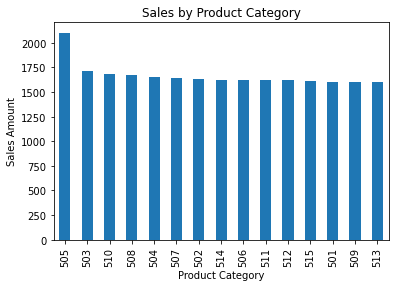

In [13]:
dd.product_category.value_counts().plot(kind="bar")
plt.title('Sales by Product Category');
plt.xlabel('Product Category')
plt.ylabel('Sales Amount',color='black');

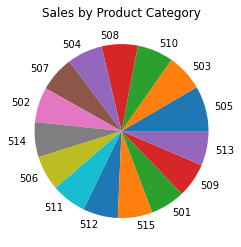

In [14]:
new_x=dd.product_category.value_counts()
plt.pie(new_x,labels=["505","503","510","508","504","507","502","514","506","511","512","515","501","509","513"]);
plt.title('Sales by Product Category');

In [15]:
Total=dd.groupby("product_category").sum()
Total[["Time_on_site","clicks_in_site"]]

,Time_on_site,clicks_in_site
product_category,,
501,123447.9,25664
502,119306.3,25695
503,137456.1,27005
504,117292.2,26013
505,126885.1,33779
506,125340.9,27129
507,122913.0,26840
508,122467.4,27232
509,112408.5,25491


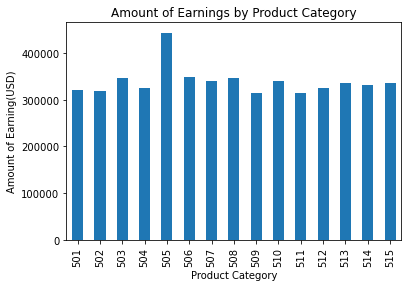

In [16]:
Total["price"].plot(kind="bar")
plt.title('Amount of Earnings by Product Category');
plt.xlabel('Product Category')
plt.ylabel('Amount of Earning(USD)',color='black');

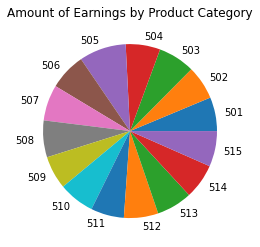

In [17]:
new_x=Total["price"]
plt.pie(new_x,labels=["501","502","503","504","505","506","507","508","509","510","511","512","513","514","515"]);
plt.title('Amount of Earnings by Product Category');

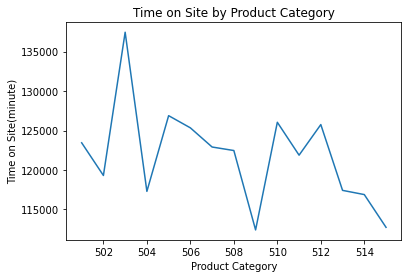

In [24]:
Total["Time_on_site"].plot()
plt.title('Time on Site by Product Category');
plt.xlabel('Product Category')
plt.ylabel('Time on Site(minute)',fontsize = 10,color='black');

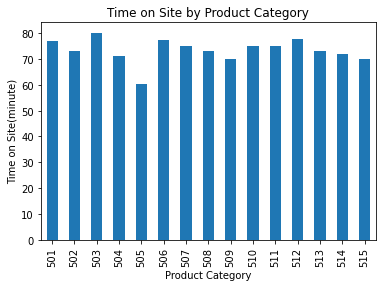

In [22]:
TT=dd.groupby("product_category").mean()
TT["Time_on_site"].plot(kind="bar")
plt.title('Time on Site by Product Category');
plt.xlabel('Product Category')
plt.ylabel('Time on Site(minute)',fontsize = 10,color='black');

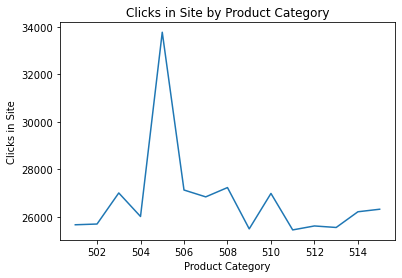

In [23]:
Total["clicks_in_site"].plot()
plt.title('Clicks in Site by Product Category');
plt.xlabel('Product Category')
plt.ylabel('Clicks in Site',color='black');